<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/AddCircuit_Advanced_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
#plt.rcParams["figure.figsize"] = (15,10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

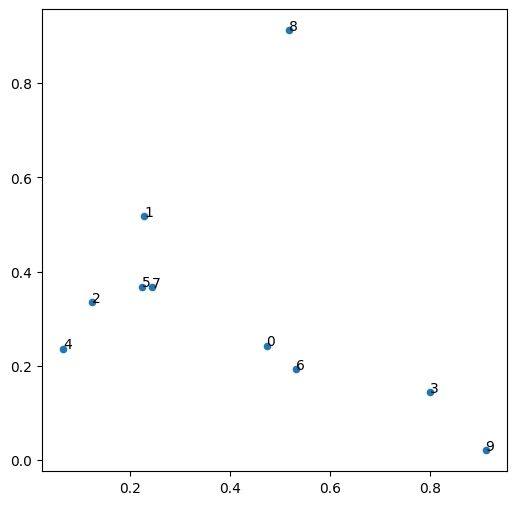

In [2]:
df = pd.DataFrame()
N = 10

nodes = [n for n in range(N)]
df['X'] = [random.random() for n in nodes]
df['Y'] = [random.random() for n in nodes]

def dist(i,j,df):
  x1,y1 = df.loc[i,'X'],df.loc[i,'Y']
  x2,y2 = df.loc[j,'X'],df.loc[j,'Y']
  return int(1000*np.sqrt( (x1-x2)**2 +(y1-y2)**2))

plt.figure(figsize=(6,6))

plt.scatter(df['X'],df['Y'],s=20)
for n in nodes:
  x1,y1 = df.loc[n,'X'],df.loc[n,'Y']
  plt.text(x1,y1, s=str(n))
plt.show()

In [3]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()

U = {(i,j):model.NewBoolVar(f"connection_{i}_{j}")  for i in nodes for j in nodes if i!=j}

arcs = [(i,j,v) for (i,j),v in U.items() ]
arcs += [(5,5,True)]
model.AddCircuit(arcs)

# Maximize x
expressions = [v*dist(i,j,df) for (i,j),v in U.items() ]
model.Minimize(sum(expressions))

solver.Solve(model)



#print(f"x", solver.Value(x))


4

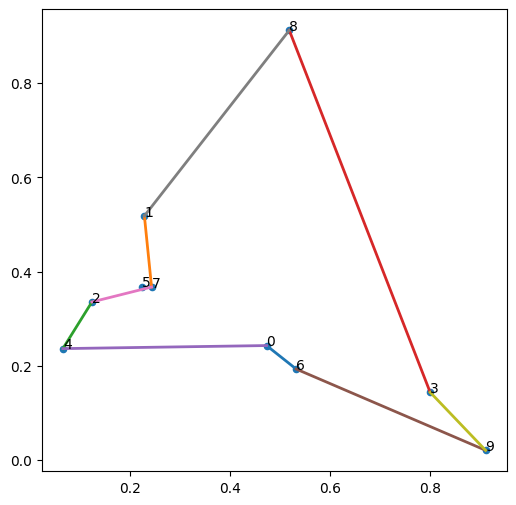

In [4]:
plt.figure(figsize=(6,6))

plt.scatter(df['X'],df['Y'],s=20)
for n in nodes:
  x1,y1 = df.loc[n,'X'],df.loc[n,'Y']
  plt.text(x1,y1, s=str(n))

for (i,j),v in U.items():
  if solver.Value(v)>0:
    x1,y1 = df.loc[i,'X'],df.loc[i,'Y']
    x2,y2 = df.loc[j,'X'],df.loc[j,'Y']
    plt.plot([x1,x2],[y1,y2], lw= 2)

plt.show()

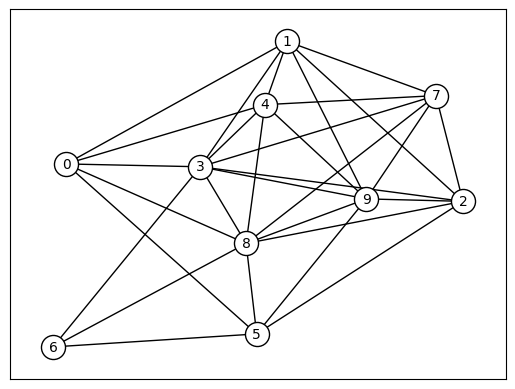

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
n = 10  # 10 nodes
m = 30  # 20 edges
seed = 2010  # seed random number generators for reproducibility
# Use seed for reproducibility
options = {
    "font_size": 10,
    "node_size": 300,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}

G = nx.gnm_random_graph(n, m, seed=seed)
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw_networkx(G, pos, **options)
plt.show()

def distG(i,j):
  x1,y1 = pos[i][0],pos[i][1]
  x2,y2 = pos[j][0],pos[j][1]
  return int(1000*np.sqrt( (x1-x2)**2 +(y1-y2)**2))

connect = {}
for (i,j) in G.edges():
  connect[i,j] = distG(i,j)
  connect[j,i] = distG(i,j)

In [6]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
nodes = [n for n in G.nodes()]

U = {(i,j):model.NewBoolVar(f"connection_{i}_{j}")  for (i,j) in connect}

arcs = [(i,j,v) for (i,j),v in U.items() ]
arcs += [(8,8,True)]

#arcs += [(17,13,True)]

#arcs += [(n,n,model.NewBoolVar(f"connection_{n}_{n}")) for n in nodes]

model.AddCircuit(arcs)

# Maximize x
expressions = [v*connect[i,j] for (i,j),v in U.items() ]
model.Minimize(sum(expressions))

status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("Optimal solutionis found")


Optimal solutionis found


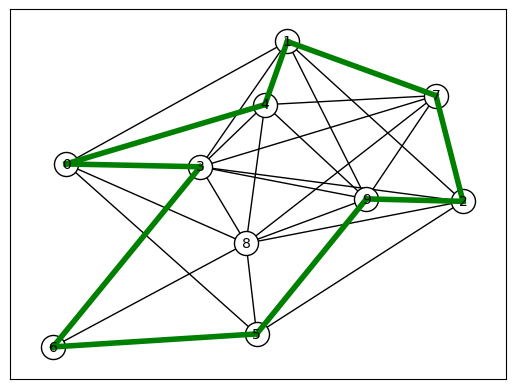

In [7]:
nx.draw_networkx(G, pos, **options)

for (i,j),v in U.items():
  if solver.Value(v)>0:
    x1,y1 = pos[i][0],pos[i][1]
    x2,y2 = pos[j][0],pos[j][1]
    plt.plot([x1,x2],[y1,y2],lw=4,c='g')